<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
%%capture
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt

Original dataset.
http://lib.stat.cmu.edu/datasets/boston

Feature names in order 
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's

In [2]:
# getting the dataset. 
#from tensorflow.keras.datasets import Boston
# documentation on boston housing dataset. 
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
boston = tf.keras.datasets.boston_housing

In [11]:
# loading the dataset. the dataset is a tuple of 
# Numpy arrays: (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = boston

In [14]:
x_train[:2]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00]])

In [13]:
y_train[:2]

array([15.2, 42.3])

In [15]:
x_train.shape

(404, 13)

In [16]:
x_test.shape

(102, 13)

In [18]:
y_train.shape

(404,)

In [21]:
# normalizing x_train data using tensorflow

x_train = tf.keras.utils.normalize(x_train)
x_train[:2]

array([[2.41189924e-03, 0.00000000e+00, 1.59296858e-02, 0.00000000e+00,
        1.05284655e-03, 1.20196720e-02, 1.79453585e-01, 7.78264954e-03,
        7.82785541e-03, 6.00787902e-01, 4.10962409e-02, 7.76718953e-01,
        3.66343633e-02],
       [4.07923050e-05, 1.54587284e-01, 3.80378407e-03, 0.00000000e+00,
        7.77620881e-04, 1.42595058e-02, 2.94184285e-02, 1.17486336e-02,
        3.74757051e-03, 6.52077269e-01, 2.75446433e-02, 7.40857215e-01,
        5.82747215e-03]])

In [22]:
# normalizing x_test data using tensorflow

x_test = tf.keras.utils.normalize(x_test)
x_test[:2]

array([[2.67567471e-02, 0.00000000e+00, 2.67795319e-02, 0.00000000e+00,
        1.00460233e-03, 9.51930986e-03, 1.47953215e-01, 2.71449764e-03,
        3.55087716e-02, 9.85368413e-01, 2.98865495e-02, 4.03172511e-02,
        4.29804090e-02],
       [2.07806276e-04, 0.00000000e+00, 1.68719346e-02, 0.00000000e+00,
        9.21972852e-04, 9.96640855e-03, 1.56583689e-01, 3.96667442e-03,
        1.01130477e-02, 7.28139437e-01, 3.00020416e-02, 6.65691367e-01,
        2.73220840e-02]])

In [84]:
# designing the model 
# first layer = input layer = the number is determined by how many features
# last layer = output layer = number is determined by how many outputs
model = tf.keras.models.Sequential([keras.layers.Dense(13, activation='linear'),
                                   keras.layers.Dense(1, activation='linear')])

In [90]:
# compiling the model. 

model.compile(optimizer = 'SGD',
             loss = 'mse',
             metrics = ['mean_squared_error'])

In [139]:
# fitting the model. 

model.fit(x_train, 
          y_train, 
          epochs = 1000,
          validation_data = (x_test, y_test),
          verbose=0)

In [ ]:
# EXPLORATION OF THE HISTORY OBJECT. 

"""
model.history.history.items()
model.history.history.keys()
list(model.history.history.items())
list(model.history.history.items())[1]
list(model.history.history.items())[1][1]
list(model.history.history.values())
list(model.history.history.values())[0]
list(model.history.history.items())[2][1]
"""

In [141]:
# has to be done immediately after .fit is run, it not, this will come
# up empty. because .history is an object .fit method returns. 
model.history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

In [146]:
# train and loss mean squared error
train_mse = list(model.history.history.items())[0][1]
test_mse = list(model.history.history.items())[2][1]

In [ ]:
# another method for retreiving the same information above. 

"""
mse=model.history.history['mean_squared_error']
val_mse=model.history.history['val_mean_squared_error']
loss=model.history.history['loss']
val_loss=model.history.history['val_loss']
"""

In [153]:
min(test_mse)

30.279008865356445

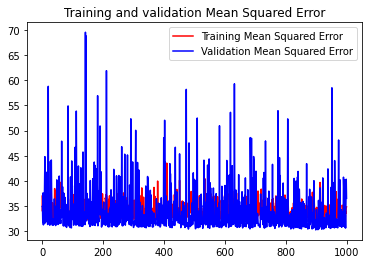

In [168]:
%matplotlib inline
epochs = range(len(train_mse)) # Get number of epochs

#------------------------------------------------
# Plot training and validation mean squared error per epoch
#------------------------------------------------

plt.plot(epochs, train_mse, 'r')
plt.plot(epochs, test_mse, 'b')
plt.title('Training and validation Mean Squared Error')
plt.legend(labels=("Training Mean Squared Error", 
                   "Validation Mean Squared Error"))
plt.show()

# if the epochs are less than 1000, then the graph will look better. 

In [ ]:
"""
Not relevant to this project. Loss and Accuracy measurement are both
Mean absolute error. 

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
"""

In [135]:
# since i didn't print the epochs, this is the mse from training data
train_scores = model.evaluate(x_train, y_train)
print(f"{model.metrics_names[0]}: {train_scores[0]}")

13/13 [==============================] - 0s 769us/step - loss: 42.1887 - mean_squared_error: 42.1887
loss: 42.188743591308594


In [136]:
# to get mean squared error on the test data

scores = model.evaluate(x_test, y_test)
print(f"{model.metrics_names[0]}: {scores[0]}")

4/4 [==============================] - 0s 1ms/step - loss: 40.0018 - mean_squared_error: 40.0018
loss: 40.001834869384766


In [94]:
# making predictions using the model

model_prediction = model.predict(x_test)

print(model_prediction[:4])

[[10.901262]
 [22.643673]
 [26.89332 ]
 [28.736502]]


In [95]:
# verifying the classification from above
list(y_test[:4])

[7.2, 18.8, 19.0, 27.0]

In [96]:
# MANUALLY calculating MSE for my own sanity
loss = tf.keras.losses.mean_squared_error(y_test, model_prediction)
loss
# literally didn't help

<tf.Tensor: shape=(102,), dtype=float32, numpy=
array([231.52727 ,  83.432884,  97.797226, 115.25764 , 112.45231 ,
        85.74443 , 139.48701 , 118.70064 ,  83.670235,  83.72137 ,
       101.821556,  87.028984,  92.675316, 208.89474 ,  89.106964,
        88.57798 ,  83.91567 ,  83.31818 ,  84.72003 ,  84.38611 ,
       132.16223 , 122.28406 ,  87.53092 ,  88.185585, 114.96811 ,
        83.30331 , 113.435875, 320.9442  , 155.30132 ,  85.35709 ,
        84.132614, 121.12966 , 185.9988  ,  83.26198 ,  91.757835,
       199.47061 , 113.68161 ,  94.84169 ,  86.10618 , 192.02615 ,
       137.62193 , 111.93422 ,  87.50894 , 114.17143 , 253.57863 ,
       101.41541 , 174.88602 ,  84.13083 ,  85.95841 ,  88.64413 ,
       271.48743 ,  87.255714, 120.90973 ,  89.29225 , 138.97499 ,
       129.10402 ,  95.608574, 185.48738 , 209.54285 , 121.33796 ,
        83.24756 ,  85.32262 , 118.1174  ,  83.3013  , 109.67423 ,
       153.60854 ,  96.72645 , 138.93808 , 180.67535 , 146.68962 ,
        83.797

In [64]:
# using linear regression to fit the same model 

import sklearn

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [66]:
# fit linear regression model. 

lr.fit(x_train, y_train)

LinearRegression()

In [74]:
# use lr for prediction. 

prediction = lr.predict(x_test)

[round(i, 1) for i in list(prediction[:4])]

[11.0, 20.1, 20.7, 31.8]

In [68]:
list(y_test[:4])

[7.2, 18.8, 19.0, 27.0]

In [75]:
# getting mean squared error score 

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(prediction, y_test)
mse

18.165510493496463

In [ ]:
# which method has the lower mean squared error score?



## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
##### Your Code Here #####
# from a previous assignment. 

# fashion mnist dataset is a 28x28 array of greyscale images. 
# the image labels are numbers. we use numbers as labels to avoid bias. 
# avoiding bias in machine learning: https://developers.google.com/machine-learning/fairness-overview/
# clothing data set has 10 categories/10 classes. 
%%capture

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
plt.imshow(train_images[42])

In [ ]:
print(train_labels[0])

# The data for a particular image is a grid of values from
# zero to 255 with pixel Grayscale values.

print(train_images[0])

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
# Sequential with 3 layers instead of 1 layer like previous lesson. 
# Flatten takes the 28 X 28 square and turn it into a simple linear array
# hidden layer takes the 784 values of an angle boot and turn it into the value 9
# see hiden layer image https://drive.google.com/file/d/1pUiscWVrUs9UHHn8nnGVpk1ZSNbcQXT9/view?usp=sharing
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # shape we should expect the data to be in. 
    keras.layers.Dense(128, activation=tf.nn.relu), # hidden layer. # 128 neurons. # variables in a function, x1, x2, x3, e.t.c
    keras.layers.Dense(10, activation=tf.nn.softmax) #10 neurons because of 10 classes of clothin in the dataset.
])

# input layer in the shape of the data
# output layer in the shape of the classes
# and a hidden layer to define the relationship between input and output layer. 

In [ ]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=5)

In [ ]:
model.evaluate(test_images, test_labels)

In [ ]:
classifications = model.predict(test_images)
print(classifications[11])

In [ ]:
print(test_labels[11])

### Fashion Mnist Dataset model in a single code cell


In [ ]:
import tensorflow as tf
from tensorflow import keras

# getting the dataset
mnist = tf.keras.datasets.mnist

# loading the dataset into different variables
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

# standardizing the dataset to have 0's and 1's
# training and testing images has numbers between 0 and 255
training_images = training_images/255.0
testing_images = testing_images/255.0

# designing the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# building the model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', 
             metrics=['accuracy'])

# fitting the training data to the training labels
model.fit(training_images, training_labels, epochs = 5)

# evaluating the accuracy of the model using testing data to see how well our
# system was trained. 
model.evaluate(testing_images, testing_labels)

# creating a classification for each of the test images. 
# The classification let's us know the probability of 
# which label the test image belongs to. is it a shoe, shirt, 
# but in this case, the classification is not shoe, shirt, e.t.c
# but rather it is a number. 
# We are testing to see if our model can 
# classify the images into the appropriate categories/labels

classifications = model.predict(testing_images)

print(classifications[0])
print(testing_labels[0])



### Fashion Mnist model code but with callback function. 

In [ ]:
# here we specify "LOSS" in callbac function

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.3):
      print("\nLoss is low so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

training_images = training_images/255.0
testing_images = testing_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

#model.predict(testing_images, testing_labels)


In [ ]:
#here we specify accuracy in call back function

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.89): #this is the difference from the code above
      print("\nReached 89% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

training_images = training_images/255.0
testing_images = testing_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

#model.predict(testing_images, testing_labels)


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.